## Set 1
1. Write a program to do the following:

    a. Read an image  
    b. Get image info  
    c. Find compression ratio for the copied image  
    d. Display negative of an image  

2. Write a program for histogram plotting of an image

3. Write a program to perform histogram equalization

4. Write a program for performing local histogram equalization

5. Develop a program for the following image enhancement operations:

    a. Brightness enhancement  
    b. Contrast enhancement  
    c. Complement of an image  
    d. Bi-level or binary contrast enhancement  
    e. Brightness slicing  
    f. Low-pass filtering  
    g. High-pass filtering  

6. Develop programs for the following geometrical transformations on an image:

    a. Translation  
    b. Rotation  
    c. Scaling  
    d. Skewing  

## Set 2
1. Write a program to perform 4 arithmetic operations between 2 images.  

2. Take a noisy image. Write a program which reduces the noise by averaging the input image by 2, 8, 16, 32, 128. Compare all the resultant images and find which one is noise-free.  

3. Write a program which implements all the types of linear spatial filters using functions.  

4. Implement a program for image convolution and correlation using a rectangular convolution mask of any odd size. The mask should be input as an ASCII text file. Test your program using the following convolutional kernels:  

   a. 3×3 averaging  
   b. 7×7 averaging  
   c. 11×11 averaging  

5. Write a prgoram for implementing median filtering of an img. Add salt and pepper noise to it. Apply the median filter to the noisy img and compare the results.
   
6. Detect the edges in an ing using the following methods and compare the relative performance of these methods:
   
    a. sobel  
    b. prewitt  
    c. roberts  
    d. lapacian of a gaussian (LoG)   
    e. canny

7. Write a program for smoothening an rgb color img with a linear spatial filter.
   
8. Write a program for sharpening an rgb color img with the laplacian filter mask.

9. Take a sample image of size 256*256. Write a program for implementing DFT filtering  

    a. with padding  
    b. without padding  

   and compare the results.

10. Write a program to implement various low pass or smoothening frequency domain filters.

11. Write a program to implement various high pass or sharpening frequency domain filters.

12. Write a program to detect straight lines using horizontal, vertical, and diagonal filter masks.

## Set 3

1. Write a program which resotres a degraded image using direct inverse filtering.

2. Write a prgraom for implementing Wiener filtering for linear img restoration using  

    a. a constant ratio  
    b. auto correaltion function.

3. Write a program to convert an rgb color space to HSI. Display the hue img, saturation img, and the intensity img.

4. Write a program to histogram equalize the intensity component of a color img, and get a new HSI img. Conver the new HSI img to rgb.

5. Write a program to detect the line segements in a binary img using Hough transform.

6. Comsider an image composed of small, non overlapping blobs. Write a program to segment the blobs based on thresholding.

7. Consider an img composed of small, non overlapping blobs. Write a program to segment the blobs based on region growing.

8. Write a program to implement the split and merge porcedure for segmenting the img with different values for minimum dimensions of the quad-tree regions.

9. Consider a binary img composed of small blobs. Write a program to segment the blobs using watershed transform.

In [1]:
!pip install matplotlib opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# skeleton:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cat.jpg', 0)
cv2.imshow('Original Image', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
# 1
import cv2, os

img = cv2.imread('cat.jpg', 255)

print('Shape: ', img.shape)
print('Size: ', img.size)
print('Type: ', img.dtype)

cv2.imwrite('compressed.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 30])
ratio = os.path.getsize('cat.jpg')/os.path.getsize('compressed.jpg')
print('Compression ratio: ', ratio)

neg = 255 -img
cv2.imshow('Negative image', neg)
cv2.waitKey(0)
cv2.destroyAllWindows()

Shape:  (216, 216, 3)
Size:  139968
Type:  uint8
Compression ratio:  24.673076923076923


C:\Users\Acer\AppData\Local\Temp\ipykernel_27428\2911954512.py:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(b.ravel(), 256, [0, 256])
C:\Users\Acer\AppData\Local\Temp\ipykernel_27428\2911954512.py:11: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(g.ravel(), 256, [0, 256])
C:\Users\Acer\AppData\Local\Temp\ipykernel_27428\2911954512.py:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(r.ravel(), 256, [0, 256])


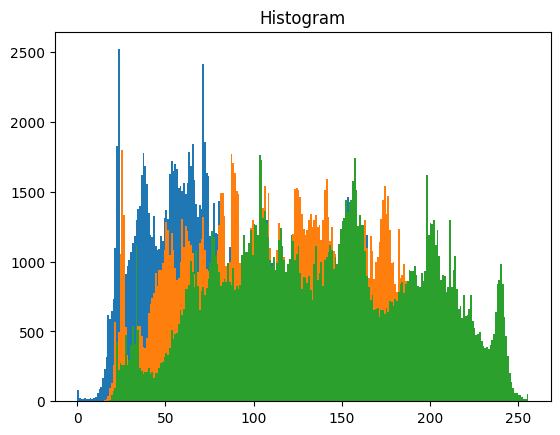

In [3]:
# 2

import cv2, matplotlib.pyplot as plt

img = cv2.imread('cat.jpg')

b, g, r = cv2.split(img)

plt.figure()
plt.hist(b.ravel(), 256, [0, 256])
plt.hist(g.ravel(), 256, [0, 256])
plt.hist(r.ravel(), 256, [0, 256])
plt.title("Histogram")
plt.show()

In [7]:
# 3

import cv2, matplotlib.pyplot as plt

img = cv2.imread('cat.jpg')
'''out = cv2.equalizeHist(img)

cv2.imshow('Equalized Image', out)
cv2.waitKey(0)
cv2.destroyAllWindows()'''

b, g, r = cv2.split(img)
out_b = cv2.equalizeHist(b)
out_g = cv2.equalizeHist(g)
out_r = cv2.equalizeHist(r)

cv2.imshow('Original Image', img)
cv2.imshow('Equalized Image', cv2.merge((out_b, out_g, out_r)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 4

import cv2

img = cv2.imread('cat.jpg')

b, g, r = cv2.split(img)

clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
b = clahe.apply(b)
g = clahe.apply(g)
r = clahe.apply(r)

cv2.imshow('Original Image', img)
cv2.imshow('Clahe local equalized image', cv2.merge((b, g, r)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 5

import cv2, numpy as np

img = cv2.imread('cat.jpg')

bright = cv2.add(img, 50)
contrast = cv2.convertScaleAbs(img, alpha=1.5, beta=0)
complement = 255 - img

grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(grey, 128, 255, cv2.THRESH_BINARY)

brightness_slice = np.where((grey>100) & (grey<150), 255, grey).astype(np.uint8)
low = cv2.GaussianBlur(img, (5,5), 0)
high = img - low

cv2.imshow('Original image', img)
cv2.imshow('brightness', bright)
cv2.imshow('contrast', contrast)
cv2.imshow('complement', complement)
cv2.imshow('binary', binary)
cv2.imshow('brightness slice', brightness_slice)
cv2.imshow('low', low)
cv2.imshow('high', high)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# 6

import cv2, numpy as np

img = cv2.imread('cat.jpg')

h, w = img.shape[:2]

translate = np.float32([[1,0,50], [0,1,50]])
translate = cv2.warpAffine(img, translate, (w,h))

rotate = cv2.getRotationMatrix2D((w//2, h//2), 45, 1)
rotate = cv2.warpAffine(img, rotate, (w,h))

scale = cv2.resize(img, None, fx=0.5, fy=0.5)

pts1 = np.float32([[0,0], [w,0], [0,h]])
pts2 = np.float32([[0,0], [w+50,0], [50,h]])
skew = cv2.getAffineTransform(pts1, pts2)
skew = cv2.warpAffine(img, skew, (w+50,h))

cv2.imshow('Original image', img)
cv2.imshow('translate', translate)
cv2.imshow('rotate', rotate)
cv2.imshow('scale', scale)
cv2.imshow('skew', skew)   
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# 2 - 1

import cv2

img1 = cv2.imread('cat.jpg')
img2 = cv2.imread('cat.jpg')

cv2.imshow('Image 1', img1)
cv2.imshow('Image 2', img2)
cv2.imshow('Addition', cv2.add(img1, img2))
cv2.imshow('Subtraction', cv2.subtract(img1, img2))
cv2.imshow('Multiplication', cv2.multiply(img1, img2))
cv2.imshow('Division', cv2.divide(img1, img2))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# 2

import cv2

img = cv2.imread('cat.jpg')

for i in [2,8,16,32,128]:
    out = cv2.blur(img, (i,i))
    cv2.imshow(f'Average {i}*{i}', out)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# 3

import cv2, numpy as np

def apply_filter(img, kernel):
    return cv2.filter2D(img, -1, kernel)

img = cv2.imread('cat.jpg')

avg = np.ones((3,3))/9
average = apply_filter(img, avg)

gauss = np.array([[1,2,1], [2,4,2], [1,2,1]])/16
gaussian = apply_filter(img, gauss)

lap = np.array([[0,1,0], [1,-4,1], [0,1,0]])
laplacian = apply_filter(img, lap)

sobel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobel = apply_filter(img, sobel)

prewitt = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt = apply_filter(img, prewitt)

cv2.imshow('original image', img)
cv2.imshow('average filter', average)
cv2.imshow('gaussian filter', gaussian)
cv2.imshow('laplacian filter', laplacian)
cv2.imshow('sobel filter', sobel)
cv2.imshow('prewitt filter', prewitt)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# 4

import cv2, numpy as np

img = cv2.imread('cat.jpg', 0)
def average_kernel(n):
    return np.ones((n,n), np.float32)/(n*n)

for n in [3,7,11]:
    kernel = average_kernel(n)
    
    cv2.imshow(f'Correlation {n}*{n}', cv2.filter2D(img, -1, kernel))
    cv2.imshow(f'Convolution {n}*{n}', cv2.filter2D(img, -1, np.flip(kernel)))

cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
# 5

import cv2, numpy as np

img = cv2.imread('cat.jpg', 0)

noise = img.copy()
noise[np.random.rand(*img.shape) <0.05] = 255

cv2.imshow('Noisy image', noise)
cv2.imshow('median filter', cv2.medianBlur(noise, 3))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# 6

import cv2, numpy as np

img = cv2.imread('cat.jpg')

sobel = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
prewitt = np.array([[-1,0,1]*3])
roberts = np.array([[1,0], [0,-1]])
LoG = np.array([[0,0,-1,0,0], [0,-1,-2,-1,0], [-1,-2,16,-2,-1], [0,-1,-2,-1,0], [0,0,-1,0,0]])
canny = cv2.Canny(img, 100, 200)

cv2.imshow('Original image', img)
cv2.imshow('sobel filter', cv2.filter2D(img, -1, sobel))
cv2.imshow('Prewitt filter', cv2.filter2D(img, -1, prewitt))
cv2.imshow('Robers filter', cv2.filter2D(img, -1, roberts))
cv2.imshow('LoG filter', cv2.filter2D(img, -1, LoG))
cv2.imshow('Canny edge detection', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# 7

import cv2

img = cv2.imread('cat.jpg')

cv2.imshow('original image', img)
cv2.imshow('Smoothened image', cv2.blur(img, (5,5)))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
# 8

import cv2, numpy as np

img = cv2.imread('cat.jpg')
lap = np.array([[0,1,0], [1,-4,1], [0,1,0]])

cv2.imshow('Original image', img)
cv2.imshow('Laplacian filter', img - cv2.filter2D(img, -1, lap))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 9
 
import cv2, numpy as np

img = cv2.imread('cat.jpg', 0)
if img is None: exit()
img = cv2.resize(img, (256,256))
rows, cols = img.shape

# low pass filter mask
mask = np.zeros((rows, cols), np.uint8)
D0 = 40
for i in range(rows):
    for j in range(cols):
        if (i-rows//2)**2 + (j-cols//2)**2 < D0*D0:
            mask[i,j] = 1

# without padding
F = np.fft.fftshift(np.fft.fft2(img))
G = F * mask
out1 = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
out1 = cv2.normalize(out1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# with padding
pad = np.zeros((512,512), np.uint8)
pad[:rows,:cols] = img
Fp = np.fft.fftshift(np.fft.fft2(pad))
mask_p = np.zeros((512,512), np.uint8)
mask_p[256-D0:256+D0, 256-D0:256+D0] = 1

Gp = Fp * mask_p
out2 = np.abs(np.fft.ifft2(np.fft.ifftshift(Gp)))
out2 = cv2.normalize(out2[:rows,:cols], None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

cv2.imshow('Original', img)
cv2.imshow('LPF without padding', out1)
cv2.imshow('LPF with padding', out2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# 10

import cv2, numpy as np

img = cv2.imread('cat.jpg', 0)
img = cv2.resize(img, (256, 256))
r, c = img.shape

F = np.fft.fftshift(np.fft.fft2(img))
u, v = np.meshgrid(np.arange(c), np.arange(r))
D = np.sqrt((u-c//2)**2 + (v-r//2)**2)
D0, n = 30, 2

ilpf = (D < D0).astype(np.uint8)
glpf = np.exp(-(D**2) / (2*D0*D0))
blpf = 1 / (1 + (D/D0)**(2*n))

for name, H in zip(['ideal', 'gaussian', 'butterworth'], [ilpf, glpf, blpf]):
    out = np.abs(np.fft.ifft2(np.fft.ifftshift(F*H)))
    out = cv2.normalize(out, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    cv2.imshow(name, out)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 11

import cv2, numpy as np

img = cv2.imread('cat.jpg', 0)
img = cv2.resize(img, (256,256))
r,c = img.shape

F = np.fft.fftshift(np.fft.fft2(img))
u,v = np.meshgrid(np.arange(c), np.arange(r))
D = np.sqrt((u-c//2)**2 + (v-r//2)**2)
D0, n = 30, 2

IHPF = (D > D0).astype(np.float32)
GHPF = 1 - np.exp(-(D**2)/(2*D0*D0))
BHPF = 1 - (1 / (1 + (D/D0)**(2*n)))

for name, H in zip(['Ideal HPF','Gaussian HPF','Butterworth HPF'], [IHPF,GHPF,BHPF]):
    out = np.abs(np.fft.ifft2(np.fft.ifftshift(F*H)))
    out = cv2.normalize(out,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)
    cv2.imshow(name, out)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [9]:
# 12

import cv2, numpy as np

img = cv2.imread('cat.jpg', 0)

h = np.array([[-1,-1,-1], [2,2,2], [-1,-1,-1]])
v = np.array([[-1,2,-1], [-1,2,-1], [-1,2,-1]])
d = np.array([[2,-1,-1], [-1,2,-1], [-1,-1,2]])

cv2.imshow('Original image', img)
cv2.imshow('horizontal', cv2.filter2D(img, -1, h))
cv2.imshow('vertical', cv2.filter2D(img, -1, v))
cv2.imshow('diagonal', cv2.filter2D(img, -1, d))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# 3 - 1

import cv2, numpy as np

img = cv2.imread('cat.jpg',0)
img = cv2.GaussianBlur(img, (5,5), 0)
kernel = np.ones((5,5))/25

H = np.fft.fft2(kernel, img.shape)
G = np.fft.fft2(img)
eps = 0.01

F = G / (H + eps)
out = np.abs(np.fft.ifft2(F))

out = cv2.normalize(out,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)
cv2.imshow('Restored', out)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [12]:
# 2

import cv2, numpy as np

img = cv2.imread('cat.jpg',0)
img = cv2.GaussianBlur(img, (5,5), 0)
kernel = np.ones((5,5))/25

H = np.fft.fft2(kernel, img.shape)
G = np.fft.fft2(img)

# (a) Constant ratio
K = 0.01
F1 = (np.conj(H)/(np.abs(H)**2 + K)) * G

# (b) Auto-correlation (approx)
K2 = np.var(img)
F2 = (np.conj(H)/(np.abs(H)**2 + K2)) * G

out1 = np.abs(np.fft.ifft2(F1))
out2 = np.abs(np.fft.ifft2(F2))

cv2.imshow('Wiener Constant', cv2.normalize(out1,None,0,255,cv2.NORM_MINMAX).astype(np.uint8))
cv2.imshow('Wiener AutoCorr', cv2.normalize(out2,None,0,255,cv2.NORM_MINMAX).astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
# 3

import cv2, numpy as np

img = cv2.imread('cat.jpg')/255.0
R,G,B = img[:,:,2], img[:,:,1], img[:,:,0]

num = 0.5*((R-G)+(R-B))
den = np.sqrt((R-G)**2+(R-B)*(G-B))+1e-6
H = np.arccos(num/den)
H[B>G] = 2*np.pi - H[B>G]

S = 1 - (3*np.minimum(np.minimum(R,G),B))/(R+G+B+1e-6)
I = (R+G+B)/3

cv2.imshow('Hue',H/np.max(H))
cv2.imshow('Saturation',S)
cv2.imshow('Intensity',I)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [15]:
# 4

import cv2, numpy as np

img = cv2.imread('cat.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
out = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

cv2.imshow('Equalized Color Image', out)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [16]:
# 5

import cv2

img = cv2.imread('cat.jpg',0)
_, binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
img = binary
edges = cv2.Canny(img,50,150)

lines = cv2.HoughLinesP(edges,1,3.14/180,100,minLineLength=50,maxLineGap=10)
imgc = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

for l in lines:
    x1,y1,x2,y2 = l[0]
    cv2.line(imgc,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imshow('Hough Lines', imgc)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [17]:
# 6

import cv2

img = cv2.imread('cat.jpg',0)
_,seg = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow('Segmented', seg)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [19]:
# 7

import cv2, numpy as np

img = cv2.imread('cat.jpg',0)
mask = np.zeros((img.shape[0]+2,img.shape[1]+2),np.uint8)

cv2.floodFill(img, mask, (100,100), 255)
cv2.imshow('Region Grown', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

def split(img, x, y, w, h, min_size, thresh, out):
    region = img[y:y+h, x:x+w]

    # stop condition
    if w <= min_size or h <= min_size or np.var(region) < thresh:
        mean_color = np.mean(region, axis=(0,1))
        out[y:y+h, x:x+w] = mean_color
        return

    # split into 4
    hw, hh = w//2, h//2
    split(img, x,      y,      hw, hh, min_size, thresh, out)
    split(img, x+hw,   y,      hw, hh, min_size, thresh, out)
    split(img, x,      y+hh,   hw, hh, min_size, thresh, out)
    split(img, x+hw,   y+hh,   hw, hh, min_size, thresh, out)

img = cv2.imread('cat.jpg')

out = img.copy()

min_size = 8
thresh = 15

h, w, _ = img.shape
split(img, 0, 0, w, h, min_size, thresh, out)

cv2.imshow('Original', img)
cv2.imshow('Split and Merge Segmentation', out)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [21]:
# 9

import cv2, numpy as np

img = cv2.imread('cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

_,th = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
dist = cv2.distanceTransform(th,cv2.DIST_L2,5)
_,sure = cv2.threshold(dist,0.7*dist.max(),255,0)

sure = np.uint8(sure)
markers = cv2.connectedComponents(sure)[1]
markers = cv2.watershed(img,markers)

img[markers==-1] = [255,0,0]
cv2.imshow('Watershed', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
